<a href="https://colab.research.google.com/github/TriPhan15/Graph-coloring/blob/main/B%C3%A0i_To%C3%A1n_T%C3%B4_M%C3%A0u___Tr%C3%ADPhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # thư viện đọc file csv
import numpy as np # thư viện toán học xử lý ma trận và lưu file
import io # thư viện chuyển file --> dạng Pandas
from google.colab import files # tạo nút upload trên colab

def upload_matrix_csv():
    print("\n--- UPLOAD FILE CSV MA TRẬN KỀ (0 và 1) ---")
    print(" Lưu ý định dạng file CSV:")
    print("   1. Không có tiêu đề (header) cột/hàng.")
    print("   2. Chỉ chứa số 0 và 1.")
    print("   3. Số dòng phải bằng số cột (Ma trận vuông).")
    print("-" * 40)

    try:
        # 1. Hiện nút upload
        uploaded = files.upload()

        if not uploaded:
            print("Bạn chưa chọn file nào!")
            return

        filename = next(iter(uploaded))
        print(f"\n=> Đang đọc file: {filename}...")

        # 2. Đọc file CSV bằng pandas
        # header=None: Để máy hiểu dòng đầu tiên là dữ liệu luôn
        df = pd.read_csv(io.BytesIO(uploaded[filename]), header=None)

        # Lấy giá trị ra mảng numpy
        matrix = df.values
        rows, cols = matrix.shape

        # 3. Kiểm tra tính hợp lệ
        if rows != cols:
            print(f"LỖI: Ma trận không vuông! File của bạn có {rows} dòng nhưng lại có {cols} cột.")
            print(" -> Vui lòng kiểm tra lại file CSV.")
            return

        # Kiểm tra xem có chứa ký tự lạ không (chỉ chấp nhận số)
        if not np.issubdtype(matrix.dtype, np.number):
            print("LỖI: File chứa ký tự không phải số. Vui lòng chỉ để số 0 và 1.")
            return

        # 4. Lưu thành file input.txt (cách nhau bởi dấu cách)
        # fmt='%d': Lưu dạng số nguyên, không phải số thực (0.0)
        np.savetxt("input.txt", matrix, fmt='%d', delimiter=' ')

        print("\n" + "="*40)
        print("XỬ LÝ THÀNH CÔNG!")
        print(f"-> Đã nhận diện đồ thị có {rows} đỉnh.")
        print("-> Đã lưu vào 'input.txt'.")
        print("\nMA TRẬN CỦA BẠN:")
        print(matrix)
        print("="*40)

    except Exception as e:
        print(f"Có lỗi xảy ra: {e}")

# Chạy hàm
upload_matrix_csv()


--- UPLOAD FILE CSV MA TRẬN KỀ (0 và 1) ---
 Lưu ý định dạng file CSV:
   1. Không có tiêu đề (header) cột/hàng.
   2. Chỉ chứa số 0 và 1.
   3. Số dòng phải bằng số cột (Ma trận vuông).
----------------------------------------


Saving Graph.csv to Graph (2).csv

=> Đang đọc file: Graph (2).csv...

XỬ LÝ THÀNH CÔNG!
-> Đã nhận diện đồ thị có 6 đỉnh.
-> Đã lưu vào 'input.txt'.

MA TRẬN CỦA BẠN:
[[0 1 1 0 1 0]
 [1 0 1 1 0 1]
 [1 1 0 1 1 0]
 [0 1 1 0 0 1]
 [1 0 1 0 0 1]
 [0 1 0 1 1 0]]


In [ ]:
import networkx as nx          # Thư viện chuyên dùng để xử lý và vẽ đồ thị (đỉnh, cạnh)
import matplotlib.pyplot as plt # Thư viện vẽ hình đồ thị
import numpy as np             # Thư viện toán học (xử lý mảng, số liệu)

# 1. Hàm đọc file
def read_matrix(filename):
    matrix = []
    try:
        with open(filename, 'r') as f:
            for line in f:
                row = [int(x) for x in line.strip().split()]
                if row:
                    matrix.append(row)
        return matrix
    except FileNotFoundError:
        return None

# 2. Thuật toán tô màu (Dynamic Greedy)
def graph_coloring_algorithm(matrix):
    num_nodes = len(matrix)
    nodes = [chr(65 + i) for i in range(num_nodes)] # A, B, C...

    # Mở rộng kho màu để không bị thiếu
    available_colors = ["Red", "Blue", "Green", "Yellow", "Orange", "Purple", "Pink", "Cyan", "Gray", "Brown", "Lime", "Magenta"]

    current_degrees = {}
    for i in range(num_nodes):
        current_degrees[nodes[i]] = sum(matrix[i])

    domain = {node: list(available_colors) for node in nodes}
    solution = {}
    uncolored_nodes = list(nodes)

    print(f"[*] Bậc ban đầu: {current_degrees}\n")
    step_count = 1

    while uncolored_nodes:
        print(f"--- BƯỚC {step_count} ---")

        # Chọn đỉnh có bậc cao nhất (nếu bằng nhau thì chọn theo tên A,B,C)
        u = max(uncolored_nodes, key=lambda node: (current_degrees[node], -ord(node)))

        if not domain[u]:
            print(f"LỖI: Hết màu để tô cho đỉnh {u}!")
            return None, None

        color_assigned = domain[u][0]
        solution[u] = color_assigned
        print(f"1. Chọn đỉnh {u} (Bậc hiện tại: {current_degrees[u]}) -> Tô màu: {color_assigned}")

        # Xử lý hậu kỳ
        uncolored_nodes.remove(u)
        current_degrees[u] = 0
        u_idx = nodes.index(u)

        print(f"2. Cập nhật láng giềng của {u}:")
        updated_any = False
        for v_idx, is_connected in enumerate(matrix[u_idx]):
            if is_connected == 1:
                v_name = nodes[v_idx]
                if v_name in uncolored_nodes:
                    # Giảm bậc láng giềng chưa tô
                    current_degrees[v_name] -= 1
                    updated_any = True

                    # Loại bỏ màu vừa dùng khỏi miền giá trị của láng giềng
                    if color_assigned in domain[v_name]:
                        domain[v_name].remove(color_assigned)
                        print(f"   - Đỉnh {v_name}: Bậc giảm còn {current_degrees[v_name]} | Loại bỏ màu {color_assigned}")

        if not updated_any:
            print("   - (Không có láng giềng nào cần cập nhật)")

        print("-" * 30)
        step_count += 1

    return solution, nodes

# 3. Hàm kiểm tra tính đúng đắn
def verify_coloring(matrix, solution, nodes):
    print("\n Đang kiểm tra tính hợp lệ của màu tô...")
    is_valid = True
    for i in range(len(matrix)):
        for j in range(i + 1, len(matrix)):
            if matrix[i][j] == 1: # Nếu có cạnh nối
                u, v = nodes[i], nodes[j]
                if solution[u] == solution[v]:
                    print(f" LỖI: Hai đỉnh kề nhau {u} và {v} cùng màu {solution[u]}!")
                    is_valid = False

    if is_valid:
        print(" KIỂM TRA THÀNH CÔNG: Không có 2 đỉnh kề nhau nào trùng màu.")
    return is_valid

# 4. Hàm vẽ đồ thị
def draw_graph(matrix, solution, nodes):
    G = nx.Graph()
    for i in range(len(matrix)):
        G.add_node(nodes[i])
        for j in range(i + 1, len(matrix)):
            if matrix[i][j] == 1:
                G.add_edge(nodes[i], nodes[j])

    colors = [solution[node] for node in G.nodes()]

    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color=colors,
            node_size=2000, font_color="black", font_weight="bold", edge_color="gray", width=1.5)
    plt.title(f"Đồ thị đã tô màu (Sắc số: {len(set(solution.values()))})")
    plt.show()

THUẬT TOÁN TÔ MÀU ĐỒ THỊ
[*] Bậc ban đầu: {'A': 3, 'B': 4, 'C': 4, 'D': 3, 'E': 3, 'F': 3}

--- BƯỚC 1 ---
1. Chọn đỉnh B (Bậc hiện tại: 4) -> Tô màu: Red
2. Cập nhật láng giềng của B:
   - Đỉnh A: Bậc giảm còn 2 | Loại bỏ màu Red
   - Đỉnh C: Bậc giảm còn 3 | Loại bỏ màu Red
   - Đỉnh D: Bậc giảm còn 2 | Loại bỏ màu Red
   - Đỉnh F: Bậc giảm còn 2 | Loại bỏ màu Red
------------------------------
--- BƯỚC 2 ---
1. Chọn đỉnh C (Bậc hiện tại: 3) -> Tô màu: Blue
2. Cập nhật láng giềng của C:
   - Đỉnh A: Bậc giảm còn 1 | Loại bỏ màu Blue
   - Đỉnh D: Bậc giảm còn 1 | Loại bỏ màu Blue
   - Đỉnh E: Bậc giảm còn 2 | Loại bỏ màu Blue
------------------------------
--- BƯỚC 3 ---
1. Chọn đỉnh E (Bậc hiện tại: 2) -> Tô màu: Red
2. Cập nhật láng giềng của E:
------------------------------
--- BƯỚC 4 ---
1. Chọn đỉnh D (Bậc hiện tại: 1) -> Tô màu: Green
2. Cập nhật láng giềng của D:
   - Đỉnh F: Bậc giảm còn 0 | Loại bỏ màu Green
------------------------------
--- BƯỚC 5 ---
1. Chọn đỉnh A (Bậc h

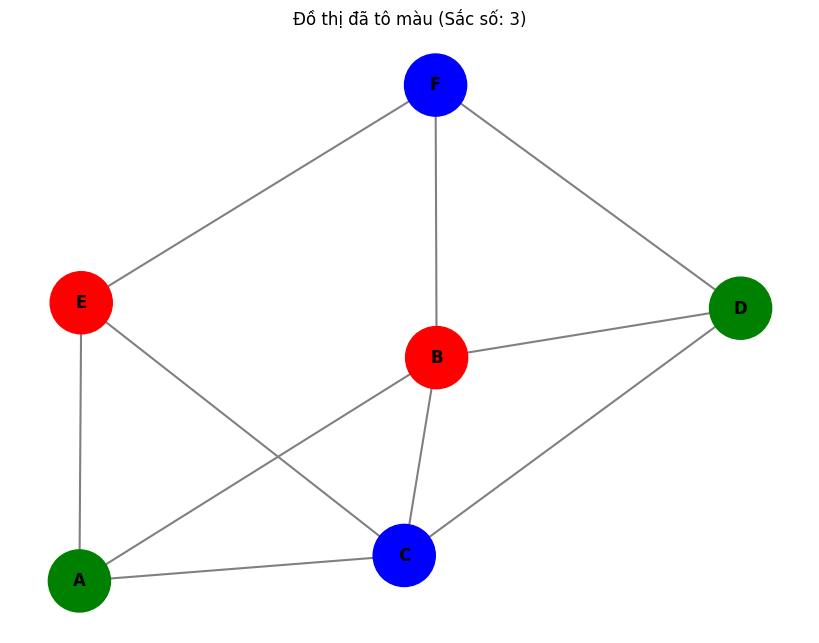

In [ ]:
# --- Ô 3: CHẠY CHƯƠNG TRÌNH ---
input_file = "input.txt"

adjacency_matrix = read_matrix(input_file)

if adjacency_matrix:
    print("="*40)
    print("THUẬT TOÁN TÔ MÀU ĐỒ THỊ")
    print("="*40)

    result, node_names = graph_coloring_algorithm(adjacency_matrix)

    if result:
        # 1. In bảng kết quả
        print("\n" + "="*20)
        print("KẾT QUẢ CUỐI CÙNG")
        print("="*20)
        print(f"{'Đỉnh':<10} | {'Màu tô'}")
        print("-" * 25)
        for node, color in sorted(result.items()):
            print(f"{node:<10} | {color}")

        # 2. In Sắc số (Chromatic Number)
        chromatic_number = len(set(result.values()))
        print("-" * 25)
        print(f" Số màu tối thiểu sử dụng (Chromatic Number): {chromatic_number}")

        # 3. Kiểm tra logic
        verify_coloring(adjacency_matrix, result, node_names)

        # 4. Vẽ hình
        draw_graph(adjacency_matrix, result, node_names)
    else:
        print("Không tìm thấy lời giải.")
else:
    print("Lỗi đọc file.")